In [2]:
import numpy as np
import pandas as pd

In [3]:
!pip install chardet --quiet

In [4]:
import chardet
file = "spam.csv"
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'Windows-1252', 'confidence': 0.7272080023536335, 'language': ''}

In [16]:
df = pd.read_csv("spam.csv",encoding="Windows-1252")
df['v2'].iloc[9]

'Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030'

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
print("From the above detailsx we can infer that we can remove the Unnamed columns because the non-null values are very very less")

In [5]:
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1,inplace=True)

In [6]:
df.sample(5)

,v1,v2
1779,spam,"Loan for any purpose å£500 - å£75,000. Homeown..."
3220,spam,"Thanks for your ringtone order, reference numb..."
1213,ham,"Yeah, probably but not sure. Ilol let u know, ..."
3782,ham,Can you do online transaction?
5426,ham,Oh yeah! And my diet just flew out the window


In [7]:
df.rename(columns={"v1":"target","v2":"text"},inplace=True)

In [8]:
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [9]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df["target"] = encoder.fit_transform(df["target"])

In [10]:
# Alternative pythonic approach
# names = {"spam":0,"ham":1}
# df["target"] = df["target"].map(names)

In [11]:
#Check for missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [12]:
#Checking for duplicate values
df.duplicated().sum()

403

In [13]:
# removing duplicates
df = df.drop_duplicates(keep="first")

In [14]:
#Checking the dataset after cleaning
df.shape

(5169, 2)

# EDA

In [15]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

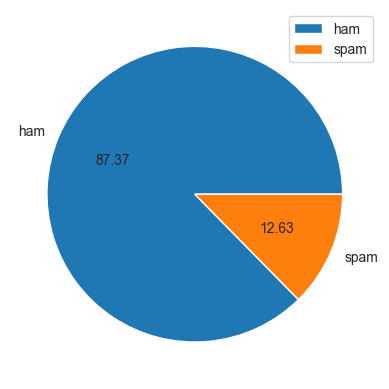

In [16]:
# Visualising with a pie plot
import matplotlib.pyplot as plt
plt.pie(df["target"].value_counts(), labels=["ham","spam"],autopct="%0.2f")
plt.legend()
plt.show()

In [17]:
import nltk

In [18]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /Users/kausik/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
df["num_characters"] = df["text"].apply(len)
df

/var/folders/r7/jwzdkh1512v2b1_q9q4ky_6c0000gn/T/ipykernel_2983/4000536084.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num_characters"] = df["text"].apply(len)


,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [20]:
# Getting the number of words
df["num_words"] = df["text"].apply(lambda x: len(nltk.word_tokenize(x )))
df

/var/folders/r7/jwzdkh1512v2b1_q9q4ky_6c0000gn/T/ipykernel_2983/2539502792.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num_words"] = df["text"].apply(lambda x: len(nltk.word_tokenize(x )))


,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [21]:
# Finding the number of sentences
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df

/var/folders/r7/jwzdkh1512v2b1_q9q4ky_6c0000gn/T/ipykernel_2983/1178197345.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))


,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [22]:
df[
    ["num_characters",
    "num_words",
    "num_sentences"]
].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [23]:
# Analysing the spam and ham messages seperately
# First ham
df[df["target"]==0][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [24]:
#Analysing the spam messages
df[df["target"]==1][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [25]:
# From the above thing, we can infer that spam messages are a bit longer than ham messages

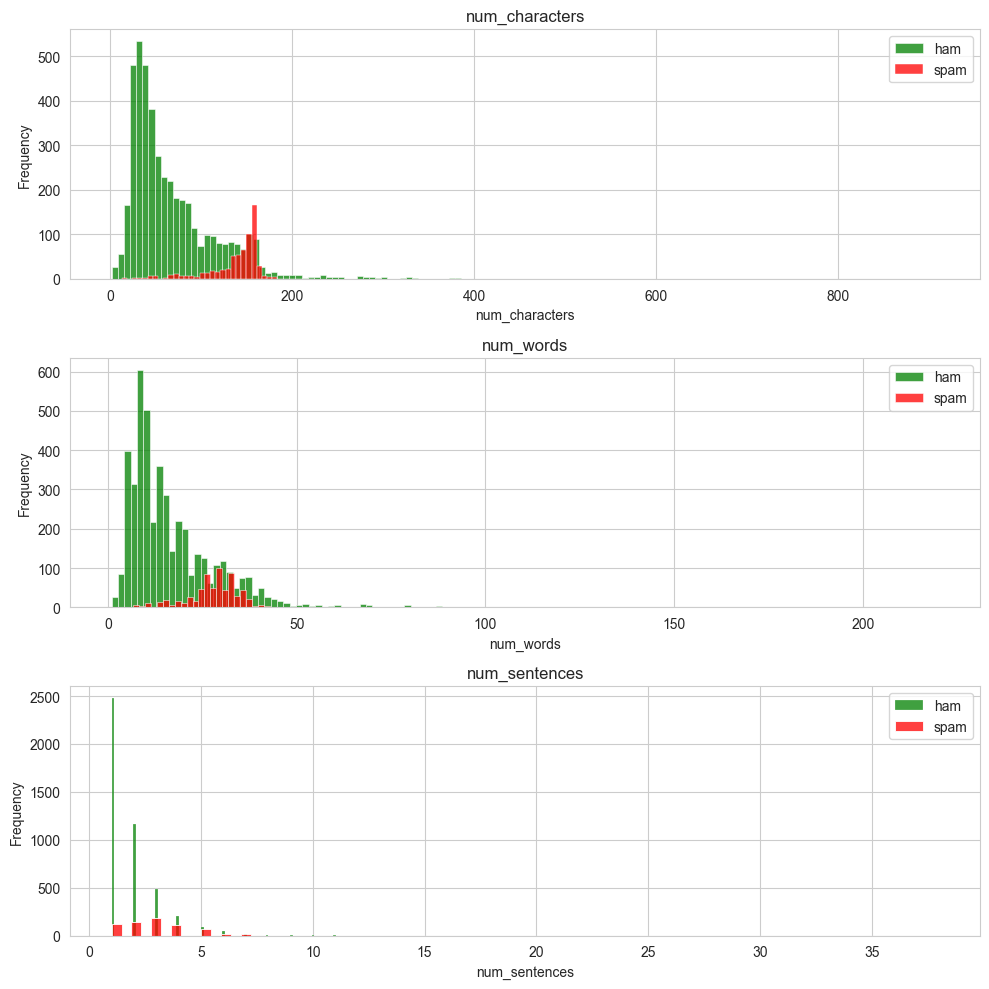

In [26]:
import seaborn as sns

fig,axes = plt.subplots(3, 1, figsize=(10,10))
columns = ["num_characters", "num_words", "num_sentences"]
for i,col in enumerate(columns):
  sns.histplot(x=col,data=df[df["target"]==0],ax=axes[i],color="green")
  sns.histplot(x=col,data=df[df["target"]==1],ax=axes[i],color="red")
  axes[i].legend(["ham","spam"])
  axes[i].set_title(col)
  axes[i].set_ylabel("Frequency")

plt.tight_layout()

### Conclusion from above Graph

From the above graph we can conclude the following

1. The number of words in ham messages are less and spam messages are more likely to have more words

2. The number of characters in ham messages are less and spam messages are more likely to have more characters.

3. The number of sentences has an quite ambiguous relationship. We'll decode it


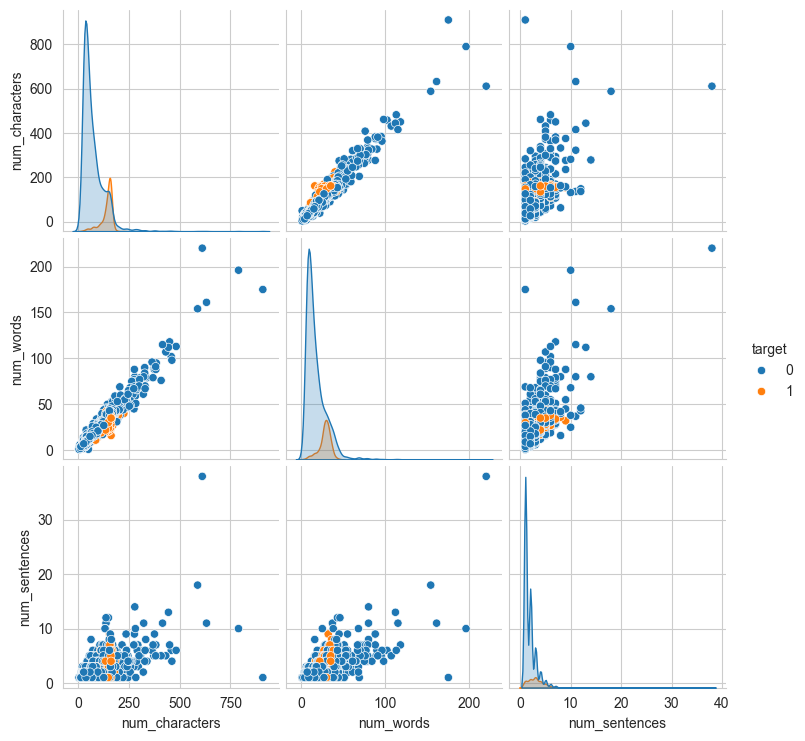

In [27]:
# Let us plot these values

sns.pairplot(data=df,hue="target")

<Axes: >

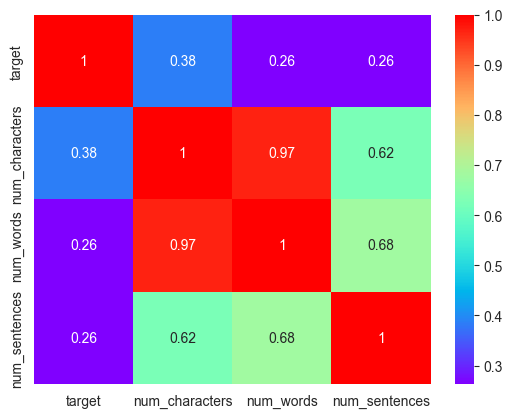

In [28]:
#Plotting the relationship between these variables
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap="rainbow")

In [29]:
print("From the above graph we can infer that the no. of chars and no. of words have a very strong correlation")
print("If I had to choose a feature, I would say no. of chars because it's correlation with target is very high")

From the above graph we can infer that the no. of chars and no. of words have a very strong correlation
If I had to choose a feature, I would say no. of chars because it's correlation with target is very high


## Data Preprocessing

* Lower Case
* Tokenisation
* Remove Special Characters
* Remove stop words and punctuation
* Stemming

In [30]:
# Let's take the approach step by step
# First is lower casing the words
def transform_text(text):
  text = text.lower()
  return text
print(transform_text("This IS GrEaT"))

this is great


In [31]:
# Next is tokenisation
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
  return text
print(transform_text("This IS GrEaT"))

['this', 'is', 'great']


In [32]:
# Punctuation removal

def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
  y = []
  for i in text:
    if i.isalnum():
      y.append(i)
  del text #free up memory space
  return y
print(transform_text("20%%"))
# This should return 20 and rmeove the % sign

['20']


In [33]:
print("Stop words are words which add no meaning to the sentence, but help in constructing sentence")
print("Let us have a look at what stopwords look like")

Stop words are words which add no meaning to the sentence, but help in constructing sentence
Let us have a look at what stopwords look like


In [34]:
nltk.download("stopwords")
from nltk.corpus import stopwords
stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kausik/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [35]:
# Removing punctuation and stop words
import string

def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
  y = []
  for i in text:
    if i.isalnum():
      y.append(i)
  del text #free up memory space
  text = y.copy()
  y.clear()
  for i in text:
    if i not in stopwords.words("english") and i not in string.punctuation:
      y.append(i)
  return y

print(transform_text("Hello $ World% you're doing good ig."))
# you're should be removed Ig

['hello', 'world', 'good', 'ig']


In [36]:
# Stemming
# Stemming is the conversion of the word to its base form, like 'running' becomes 'rum'

from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()
# LEt us have a look at what stemming is
ps.stem("loving")

'love'

In [37]:
ps.stem("Kicking")

'kick'

In [38]:
import string 
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
  y = []
  for i in text:
    if i.isalnum():
      y.append(i)
  del text # free up memory space
  text = []
  for i in y:
    if i not in stopwords.words("english") and i not in string.punctuation:
      text.append(i)
  y.clear()
  for i in text:
    # y.append(ps.stem(i))
    y.append(ps.stem(i))
  out = " ".join(y)
  del y # Free memory space
  del text # Free memory space
  return out

print(transform_text("I loved the YT lectures on Machine Learning! How about you?"))

love yt lectur machin learn


In [39]:
print("Before transformation:\n")
print(df['text'][0])
print()
print("After Transformation: \n")
print(transform_text(df['text'][0]))

Before transformation:

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...

After Transformation: 

go jurong point crazi avail bugi n great world la e buffet cine got amor wat


In [40]:
print("Before transformation:\n")
print(df['text'][10])
print()
print("After Transformation: \n")
print(transform_text(df['text'][10]))

Before transformation:

I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.

After Transformation: 

gon na home soon want talk stuff anymor tonight k cri enough today


In [41]:
# Transforming the TEXT in the DataFrame
df['transformed_text'] = df['text'].apply(transform_text)
df

/var/folders/r7/jwzdkh1512v2b1_q9q4ky_6c0000gn/T/ipykernel_2983/3680844700.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(transform_text)


,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [42]:
# Now let us form a word cloud of the most used words
from wordcloud import WordCloud

wc = WordCloud(width=500,height=500,background_color='white')

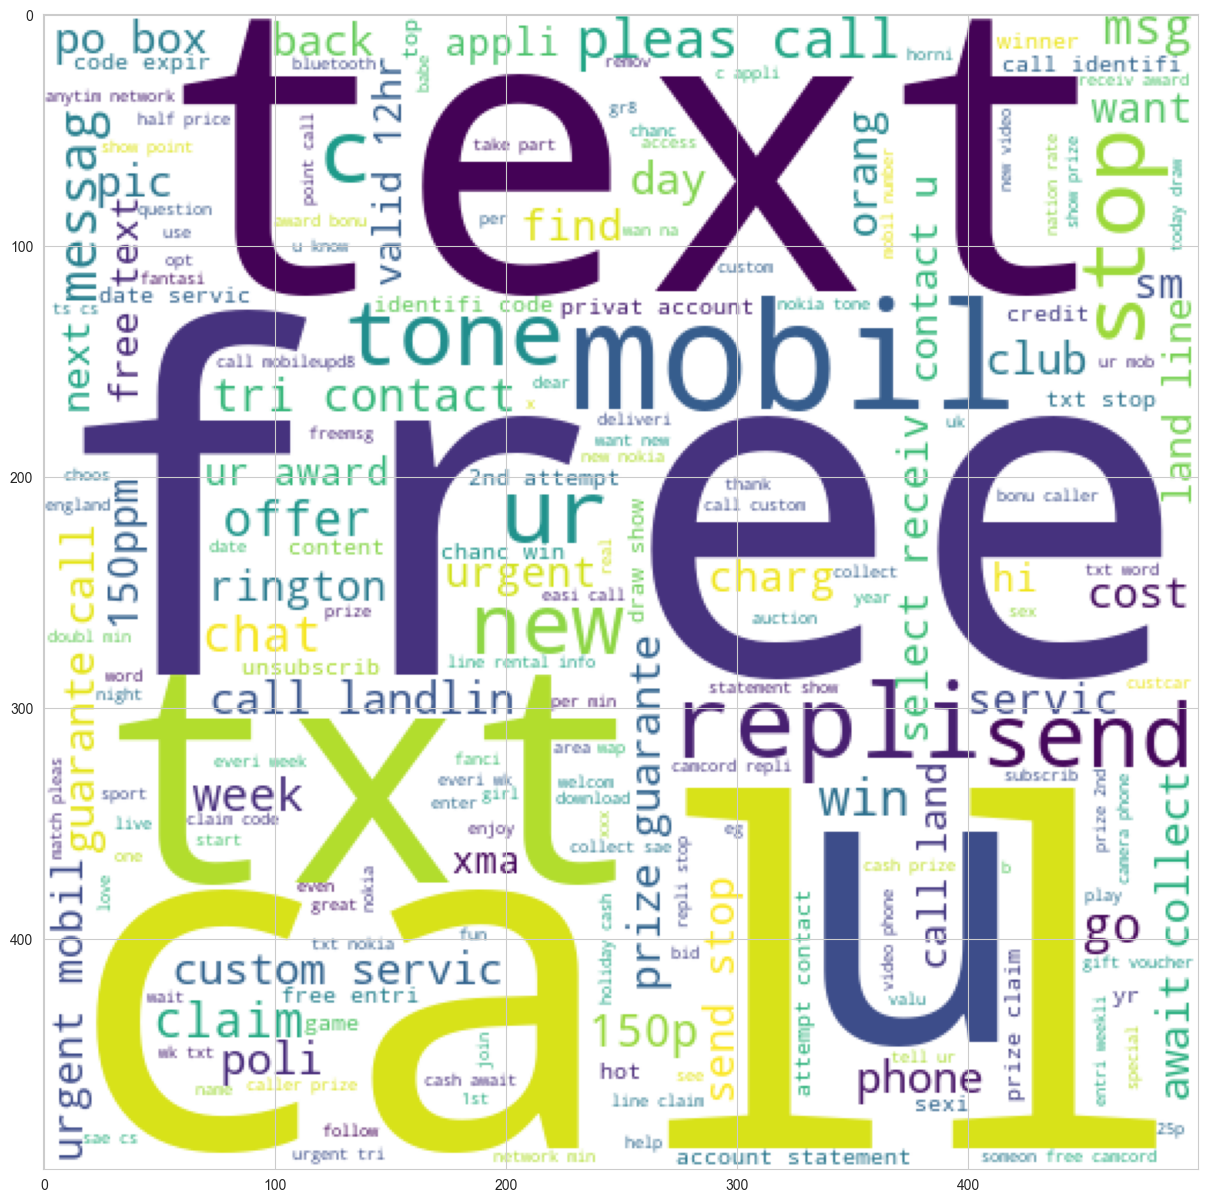

In [43]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,15))
plt.imshow(spam_wc)

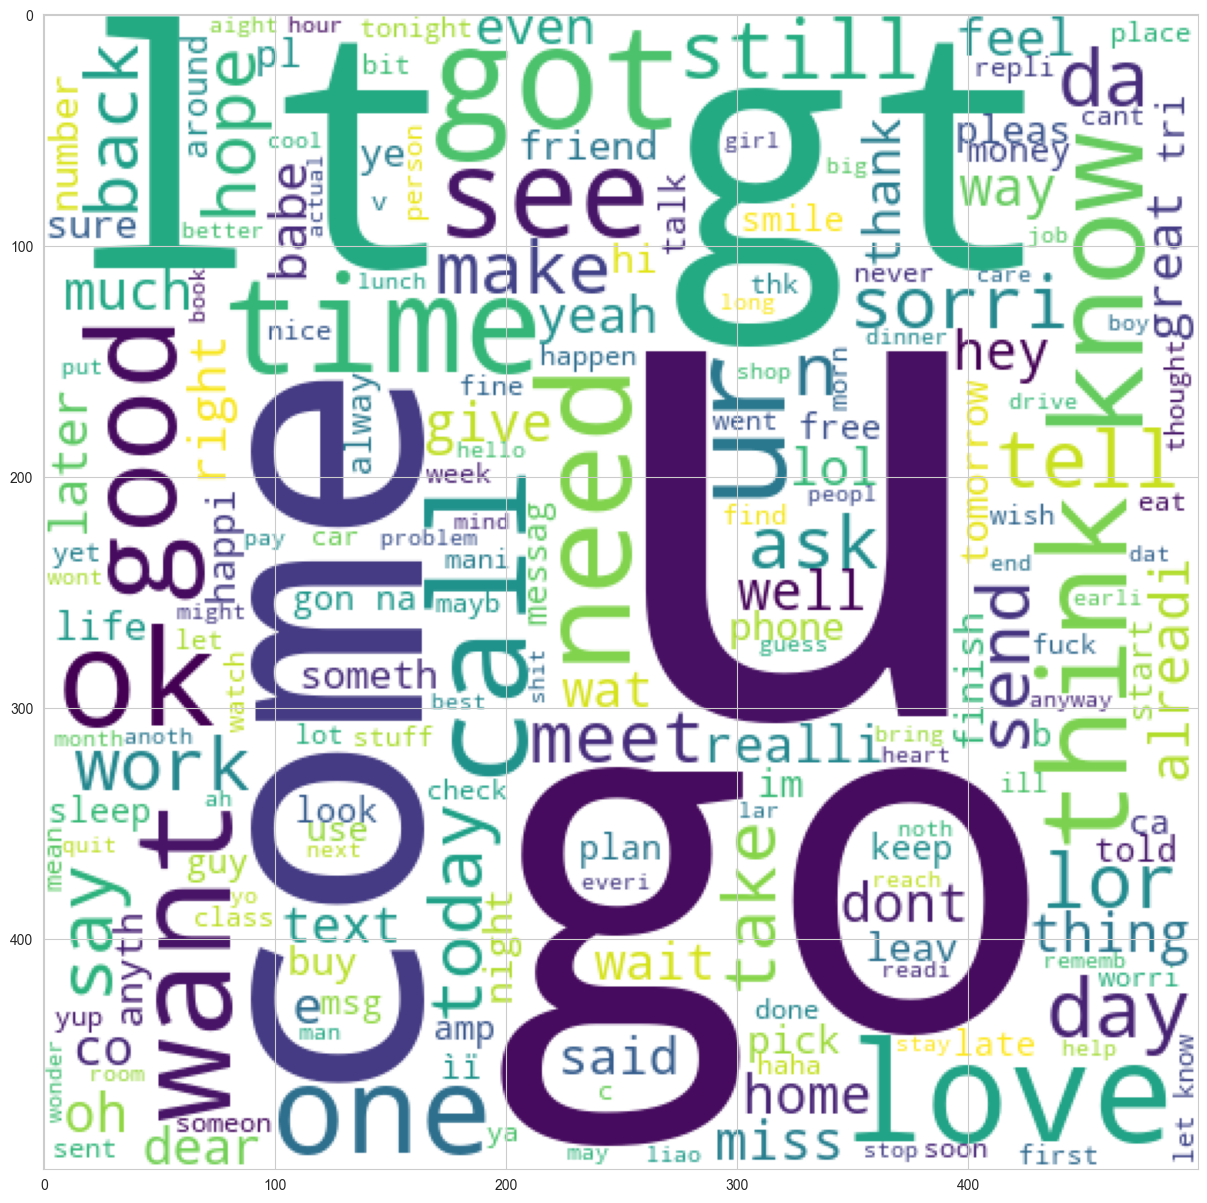

In [44]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,15))
plt.imshow(spam_wc)

In [45]:
spam_word_corpus = []
for sentence in df[df['target']==1]['transformed_text']:
  for word in sentence.split():
    spam_word_corpus.append(word)

spam_word_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [46]:
# Creating a dictionary/collection of these words
from collections import Counter
spam_word_dict = Counter(spam_word_corpus)
spam_word_dict.most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [47]:
top_spam_words = pd.DataFrame(spam_word_dict.most_common(30))
top_spam_words.rename(columns={0:"word",1:"frequency"},inplace=True)
top_spam_words

,word,frequency
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


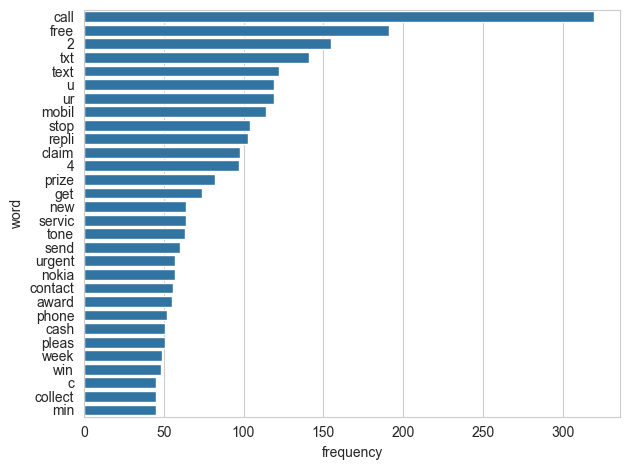

In [48]:
# Let us look at a visualisation of the same

sns.barplot(data=top_spam_words,x='frequency',y='word')
plt.tight_layout()


In [49]:
ham_words = []
for sentence in df[df['target']==0]['transformed_text']:
  for word in sentence.split(" "):
    ham_words.append(word)

In [50]:
ham_words_collection = Counter(ham_words)
top_ham_words = pd.DataFrame(ham_words_collection.most_common(30))

In [51]:
top_ham_words.rename(columns={0:"word",1:"frequency"},inplace=True)
top_ham_words

,word,frequency
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


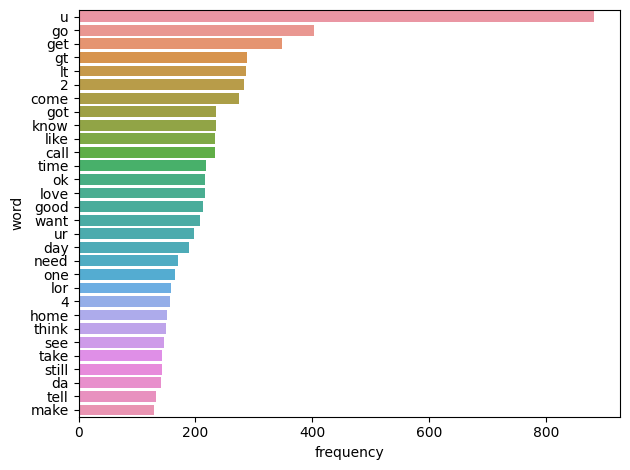

In [55]:
# Making a barplot of the same
sns.barplot(data=top_ham_words,x="frequency",y="word")
plt.tight_layout()

# ML MODELLING

Let us now use Naive-Bayes Algorithm to classify the text

In [56]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [57]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [58]:
X.shape

(5169, 6708)

In [59]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [61]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [62]:
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [63]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [64]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

In [65]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [66]:
gnb.fit(X_train,y_train)

GaussianNB()

In [67]:
mnb.fit(X_train,y_train)

MultinomialNB()

In [68]:
bnb.fit(X_train,y_train)

BernoulliNB()

In [69]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [70]:
gnb_pred = gnb.predict(X_test)
gnb_pred

array([0, 1, 1, ..., 0, 0, 0])

In [71]:
print(accuracy_score(y_test,gnb_pred))
print()
print(confusion_matrix(y_test,gnb_pred))
print()
print(precision_score(y_test,gnb_pred))

0.8800773694390716

[[792 104]
 [ 20 118]]

0.5315315315315315


In [72]:
mnb_pred = mnb.predict(X_test)
mnb_pred

array([0, 0, 0, ..., 0, 0, 0])

In [73]:
print(accuracy_score(y_test,mnb_pred))
print()
print(confusion_matrix(y_test,mnb_pred))
print()
print(precision_score(y_test,mnb_pred))

0.9642166344294004

[[871  25]
 [ 12 126]]

0.8344370860927153


In [74]:
bnb_pred = bnb.predict(X_test)
bnb_pred

array([0, 0, 0, ..., 0, 0, 0])

In [75]:
print(accuracy_score(y_test,bnb_pred))
print()
print(confusion_matrix(y_test,bnb_pred))
print()
print(precision_score(y_test,bnb_pred))

0.9700193423597679

[[893   3]
 [ 28 110]]

0.9734513274336283


### Using TFIDF Vectorizer

In [76]:
del gnb
del bnb
del mnb
del X
del y
del X_train
del X_test
del y_train
del y_test

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [78]:
y = df['target'].values

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [80]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [81]:
gnb.fit(X_train,y_train)

GaussianNB()

In [82]:
mnb.fit(X_train,y_train)

MultinomialNB()

In [83]:
bnb.fit(X_train,y_train)

BernoulliNB()

In [84]:
gnb_tf = gnb.predict(X_test)
print(accuracy_score(y_test,gnb_tf))
print()
print(confusion_matrix(y_test,gnb_tf))
print()
print(precision_score(y_test,gnb_tf))

0.8762088974854932

[[793 103]
 [ 25 113]]

0.5231481481481481


In [85]:
bnb_tf = bnb.predict(X_test)
print(accuracy_score(y_test,bnb_tf))
print()
print(confusion_matrix(y_test,bnb_tf))
print()
print(precision_score(y_test,bnb_tf))

0.9700193423597679

[[893   3]
 [ 28 110]]

0.9734513274336283


In [86]:
mnb_tf = mnb.predict(X_test)
print(accuracy_score(y_test,mnb_tf))
print()
print(confusion_matrix(y_test,mnb_tf))
print()
print(precision_score(y_test,mnb_tf))

0.9593810444874274

[[896   0]
 [ 42  96]]

1.0


In [87]:
print("Let us use MultiBinomial Naive Bayes.\nThis classification requires a lot of precision and hence we are using MNB with TFIDF")

Let us use MultiBinomial Naive Bayes.
This classification requires a lot of precision and hence we are using MNB with TFIDF


In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [89]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

I am kinda very lazy so let us use functions and iterations to see each model and how it performs

In [90]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [91]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9729206963249516
Precision -  0.9741379310344828
For  KN
Accuracy -  0.9003868471953579
Precision -  1.0
For  NB
Accuracy -  0.9593810444874274
Precision -  1.0
For  DT
Accuracy -  0.9352030947775629
Precision -  0.8380952380952381
For  LR
Accuracy -  0.9516441005802708
Precision -  0.94
For  RF
Accuracy -  0.971953578336557
Precision -  1.0
For  AdaBoost
Accuracy -  0.9613152804642167
Precision -  0.9454545454545454
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8625954198473282
For  ETC
Accuracy -  0.9729206963249516
Precision -  0.9824561403508771
For  GBDT
Accuracy -  0.9526112185686654
Precision -  0.9238095238095239
For  xgb
Accuracy -  0.9729206963249516
Precision -  0.9435483870967742


In [100]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df.sort_values(by="Precision",ascending=False)

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.971954,1.000000
8,ETC,0.972921,0.982456
0,SVC,0.972921,0.974138
6,AdaBoost,0.961315,0.945455
10,xgb,0.972921,0.943548
4,LR,0.951644,0.940000
9,GBDT,0.952611,0.923810
7,BgC,0.958414,0.862595


In [104]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.900387
1,NB,Accuracy,0.959381
2,RF,Accuracy,0.971954
3,ETC,Accuracy,0.972921
4,SVC,Accuracy,0.972921
5,AdaBoost,Accuracy,0.961315
6,xgb,Accuracy,0.972921
7,LR,Accuracy,0.951644
8,GBDT,Accuracy,0.952611
9,BgC,Accuracy,0.958414


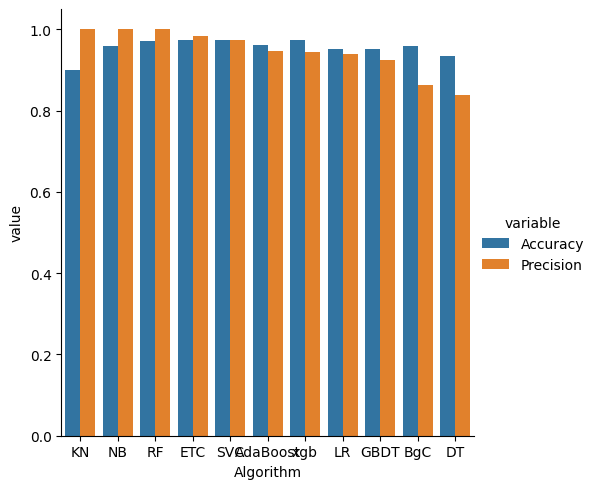

In [105]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)

In [97]:
print("I will use Naive Bayes for this application, more like a gut instinct for this decision.\nNow let us improve the model by hyperparameter tuning")

I will use Naive Bayes for this application, more like a gut instinct for this decision.
Now let us improve the model by hyperparameter tuning


In [111]:
del tfidf
del X
del y
del X_train
del X_test
del y_train
del y_test

In [112]:
tfidf = TfidfVectorizer(max_features=3000)

In [113]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [114]:
y = df['target'].values

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [116]:
print("Deleting all models and training it on TFIDF max_features of 3000")
for i in clfs.keys():
  del i

Deleting all models and training it on TFIDF max_features of 3000


In [117]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [118]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9294003868471954
Precision -  0.8282828282828283
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213


In [119]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.900387
1,NB,Accuracy,0.959381
2,RF,Accuracy,0.971954
3,ETC,Accuracy,0.972921
4,SVC,Accuracy,0.972921
5,AdaBoost,Accuracy,0.961315
6,xgb,Accuracy,0.972921
7,LR,Accuracy,0.951644
8,GBDT,Accuracy,0.952611
9,BgC,Accuracy,0.958414


In [124]:
print("From the above dataframe, we can see other models have not come around, but Naive Bayes accuracy has increased")

From the above dataframe, we can see other models have not come around, but Naive Bayes accuracy has increased


In [120]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X) # Scaling the X from TFIDF 3000

In [121]:
y = df['target'].values

In [122]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [123]:
print("Let us see model performance after Scaling")

Let us see model performance after Scaling


In [127]:
for i in clfs.keys():
  del i

In [128]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9690522243713733
Precision -  0.9274193548387096
For  KN
Accuracy -  0.9052224371373307
Precision -  0.9761904761904762
For  NB
Accuracy -  0.9787234042553191
Precision -  0.9461538461538461
For  DT
Accuracy -  0.9303675048355899
Precision -  0.8173076923076923
For  LR
Accuracy -  0.9671179883945842
Precision -  0.9642857142857143
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213


In [129]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df.sort_values(by="Precision",ascending=False)

,Algorithm,Accuracy,Precision
5,RF,0.975822,0.982906
1,KN,0.905222,0.976190
8,ETC,0.974855,0.974576
4,LR,0.967118,0.964286
2,NB,0.978723,0.946154
6,AdaBoost,0.960348,0.929204
0,SVC,0.969052,0.927419
10,xgb,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [130]:
print("The accuracy of the models haven't seen much of change, but Precision has taken a major hit in many models")
print("Let us try this X_train with the number of characters in each sentence")

The accuracy of the models haven't seen much of change, but Precision has taken a major hit in many models
Let us try this X_train with the number of characters in each sentence


In [131]:
del tfidf
del scaler
del X
del y
del X_train
del X_test
del y_train
del y_test

RuntimeError: dictionary changed size during iteration

In [137]:
del svc
del knc
del mnb
del dtc
del lrc
del rfc
del abc
del bc
del etc
del gbdt
del xgb

In [157]:
print("Let us use the final model as Multinomial Naive Bayes classifier")

Let us use the final model as Multinomial Naive Bayes classifier


# Final Pipeline and Modelling

We used the following methods/approaches for different models with basic HyperParamter Tuning

* TFIDF
* TFIDF with max_features=3000
* TFIDF with max_features=3000 and MinMaxScaler

Out of the above mentioned MultinomialNaiveBayes has performed very well with TFIDF with max_features=3000

Let us build the final pipeline and build the model

## STEP 1 of PIPELINE: Text Transformation

We'll do a quick review of the code

1. We are lower casing the text with `text.lower()`
2. Then we are tokenizing the words in the input with `nltk.word_tokenize()`
3. We are removing the punctuation by filtering with the `isalnum()` function.
4.
*   Then we are removing the stopwords with `stopwords.words('english')` from the `nltk` library.
*   Then we are removing and filtering punctuations with the help of `string.punctuations`
5. Then we are stemming words with the help of `PorterStemmer` from `nltk.stem.porter`.

These are the steps involved in text processing

In [ ]:
# Performing necessasry imports
import nltk
import pandas as pd
import numpy as np
nltk.download("punkt")
nltk.download("stopwords")

In [52]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import string
ps = PorterStemmer()
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
  y = []
  for i in text:
    if i.isalnum():
      y.append(i)
  del text # free up memory space
  text = []
  for i in y:
    if i not in stopwords.words("english") and i not in string.punctuation:
      text.append(i)
  y.clear()
  for i in text:
    y.append(ps.stem(i))
  out = " ".join(y)
  del y # Free memory space
  del text # Free memory space
  return out

print(transform_text("I loved the YT lectures on Machine Learning! How about you?"))

love yt lectur machin learn


## STEP 2: Vectorizing Words

We initially used the CountVectorizer, but due to low accuracy and precision, we switched to TFIDF

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=3000)

X = tfidf.fit_transform(df['transformed_text']).toarray()

In [54]:
y = df['target'].values
y.shape

(5169,)

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=2,test_size=0.2)

In [56]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

In [27]:
mnb.fit(X_train,y_train)

MultinomialNB()

In [28]:
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix
mnb_final = mnb.predict(X_test)

print("The accuracy of the model is ")
print(accuracy_score(y_test,mnb_final)*100)
print()
print("The precision of the model is ")
print(precision_score(y_test,mnb_final)*100)
print()
print("CONFUSION MATRIX: ")
print(confusion_matrix(y_test,mnb_final))

The accuracy of the model is 
97.09864603481626

The precision of the model is 
100.0

CONFUSION MATRIX: 
[[896   0]
 [ 30 108]]


## Constructing the final pipeline

In [31]:
import pickle
pickle.dump(tfidf,open("vectorizer_final.pkl",'wb'))
pickle.dump(mnb,open("final_model.pkl",'wb'))

In [76]:
import pickle
vectorizer = pickle.load(open("vectorizer_final.pkl",'rb+'))
text = ["WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only."]
out = vectorizer.transform([transform_text(text[0])]).toarray()


In [77]:
out

array([[0., 0., 0., ..., 0., 0., 0.]])

In [78]:
model = pickle.load(open("final_model.pkl","rb+"))
print(model.predict(out))

[1]


,target,text,num_characters,num_words,num_sentences,transformed_text
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4,freemsg hey darl 3 week word back like fun sti...
8,1,WINNER!! As a valued network customer you have...,158,32,5,winner valu network custom select receivea pri...
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3,mobil 11 month u r entitl updat latest colour ...
11,1,"SIX chances to win CASH! From 100 to 20,000 po...",136,31,3,six chanc win cash 100 pound txt csh11 send co...
...,...,...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,90,18,3,want explicit sex 30 sec ring 02073162414 cost...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,160,38,6,ask 3mobil 0870 chatlin inclu free min india c...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,160,35,5,contract mobil 11 mnth latest motorola nokia e...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,147,30,1,remind o2 get pound free call credit detail gr...
